## Importar bibliotecas

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

## Ler os dados e fazer a limpeza/ transformações necessárias

In [19]:
data_churn = pd.read_csv('../data/data_churn_clean.csv')
df_report = pd.DataFrame(columns=['Model', 'Precision', 'Recall', 'F1 Score', 'Accuracy'])

data_churn.drop(columns=["customerID"], axis=1, inplace=True)

data_churn["Churn"] = (data_churn["Churn"] == "Yes").astype(int)

In [20]:
# transformando as variáveis categóricas em variáveis dummy
data_churn_categories = pd.get_dummies(data_churn[['tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']], drop_first=True)


## Funções comuns

In [21]:
def store_metrics(model_name, y_test, y_pred):
  '''
    Stores the metrics of the model in the df_report DataFrame.

    Parameters:
    model_name: string
    y_test: numpy array
    y_pred: numpy array
  '''
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)

  df_report.loc[len(df_report)] = [model_name, precision, recall, f1, accuracy]

In [22]:
def confusion_matrix_builder(model, y_test , y_pred):
    '''
    Builds the confusion matrix of the model.

    Parameters:
    model: string
    y_test: numpy array
    y_pred: numpy array
    
    '''
    confusion_matrix = metrics.confusion_matrix(y_test , y_pred)

    sns.heatmap(confusion_matrix,
                annot=True,
                fmt='g',
                xticklabels=['Ativo','Churn'],
                yticklabels=['Ativo','Churn'], 
                cmap='Blues',)


    plt.ylabel('Atual',fontsize=12)
    plt.xlabel('Previsão',fontsize=12)
    plt.title(f'Matriz de Confusão - {model}',fontsize=15)
    plt.show()

In [23]:
def model_builder(model_name, model, X_train, y_train, X_test, y_test):
    '''
        Builds the model and stores the metrics in the df_report DataFrame.

        Parameters:
        model_name: string
        model: object
        X_train: numpy array
        y_train: numpy array
        X_test: numpy array
        y_test: numpy array
    '''

    _model = model
    _model = _model.fit(X_train, y_train)

    y_pred = _model.predict(X_test)

    store_metrics(model_name, y_test, y_pred)
    confusion_matrix_builder(model_name, y_test, y_pred)
    print(classification_report(y_test, y_pred))

## Prepara dadas de treino e teste

In [24]:
# separa as variáveis independentes e dependentes
X = data_churn_categories.drop(columns=['Churn'], axis=1)
y = data_churn_categories['Churn']

# padroniza os dados para a mesma escala
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(y.value_counts())

# adiciona mais dados para a classe minoritária
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

print(y.value_counts())

# separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1001)

Churn
0    5174
1    1869
Name: count, dtype: int64
Churn
0    5174
1    5174
Name: count, dtype: int64


## Modelos para avaliar

### Logistic Regression


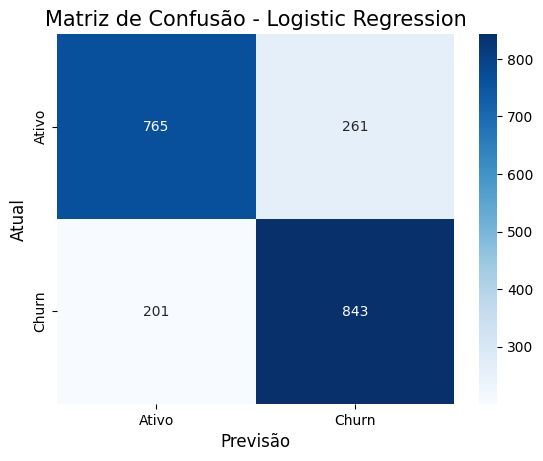

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1026
           1       0.76      0.81      0.78      1044

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [25]:
model_builder('Logistic Regression', LogisticRegression(), X_train, y_train, X_test, y_test)

## KNN
Para o KNN vamos avaliar qual o melhor valor de K, quantidade de neighbors, para o modelo e depois aplicar o modelo com o melhor valor de K.

In [26]:
def knn_model(k):
    '''
        Trains a KNN model and returns the classification report.
    '''

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_pred = knn_model.predict(X_test)

    print(f"""{k} neighbors, precison: {round(precision_score(y_test, y_pred), 3)}, recall: {round(recall_score(y_test, y_pred), 3)}, f1-score: {round(metrics.f1_score(y_test, y_pred), 3)} and accuracy: {round(accuracy_score(y_test, y_pred), 3)}.""")

    return y_pred


In [27]:
for i in range(1, 20):
    knn_model(i)

1 neighbors, precison: 0.812, recall: 0.92, f1-score: 0.863 and accuracy: 0.852.
2 neighbors, precison: 0.815, recall: 0.779, f1-score: 0.797 and accuracy: 0.8.
3 neighbors, precison: 0.761, recall: 0.875, f1-score: 0.814 and accuracy: 0.799.
4 neighbors, precison: 0.783, recall: 0.78, f1-score: 0.782 and accuracy: 0.78.
5 neighbors, precison: 0.743, recall: 0.836, f1-score: 0.787 and accuracy: 0.771.
6 neighbors, precison: 0.756, recall: 0.766, f1-score: 0.761 and accuracy: 0.757.
7 neighbors, precison: 0.739, recall: 0.818, f1-score: 0.776 and accuracy: 0.762.
8 neighbors, precison: 0.757, recall: 0.772, f1-score: 0.764 and accuracy: 0.76.
9 neighbors, precison: 0.745, recall: 0.813, f1-score: 0.777 and accuracy: 0.765.
10 neighbors, precison: 0.756, recall: 0.779, f1-score: 0.767 and accuracy: 0.762.
11 neighbors, precison: 0.743, recall: 0.802, f1-score: 0.771 and accuracy: 0.76.
12 neighbors, precison: 0.757, recall: 0.784, f1-score: 0.77 and accuracy: 0.764.
13 neighbors, preciso

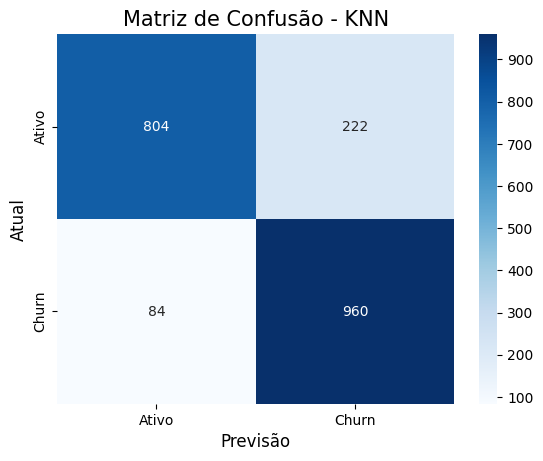

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1026
           1       0.81      0.92      0.86      1044

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070



In [28]:
model_builder('KNN', KNeighborsClassifier(n_neighbors=1), X_train, y_train, X_test, y_test)

## SVM

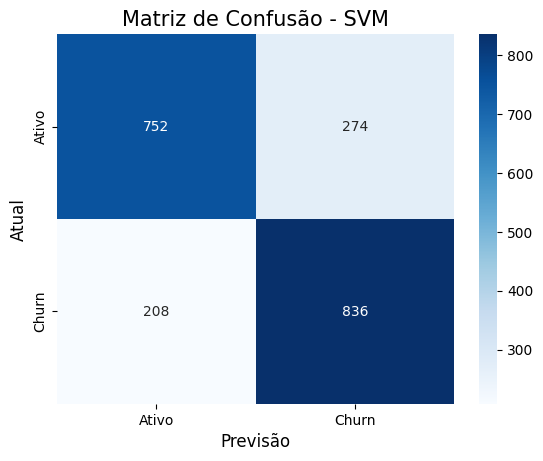

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1026
           1       0.75      0.80      0.78      1044

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [29]:
model_builder('SVM', SVC(), X_train, y_train, X_test, y_test)

## Random Forest

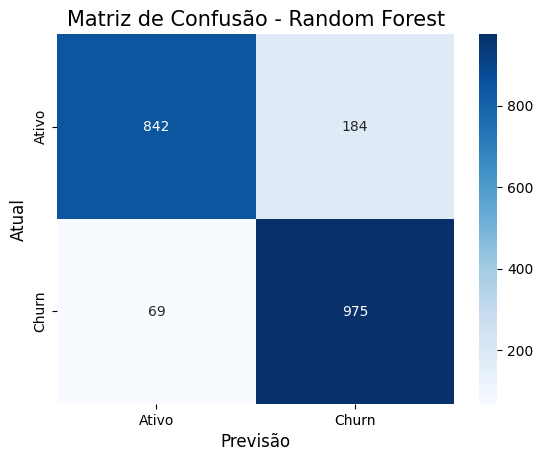

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1026
           1       0.84      0.93      0.89      1044

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070



In [30]:
model_builder('Random Forest', RandomForestClassifier(), X_train, y_train, X_test, y_test)

## Gradient Boost

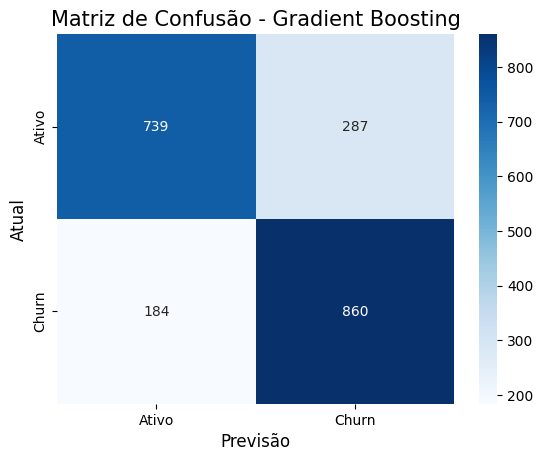

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1026
           1       0.75      0.82      0.79      1044

    accuracy                           0.77      2070
   macro avg       0.78      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [31]:
model_builder('Gradient Boosting', GradientBoostingClassifier(), X_train, y_train, X_test, y_test)

## Resultado

No primeiro teste com os modelos todos se mostraram bem semelhantes com relação aos resultados.

In [32]:
df_report

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.763587,0.807471,0.784916,0.776812
1,KNN,0.812183,0.919540,0.862534,0.852174
2,SVM,0.753153,0.800766,0.776230,0.767150
3,Random Forest,0.841242,0.933908,0.885157,0.877778
4,Gradient Boosting,0.749782,0.823755,0.785030,0.772464


In [17]:
df_report

,Model,Precision,Recall,F1 Score,Accuracy
0,Logistic Regression,0.753526,0.777182,0.765172,0.759181
1,KNN,0.814371,0.937213,0.871485,0.860456
2,SVM,0.741084,0.795559,0.767356,0.756475
3,Random Forest,0.838425,0.945636,0.888809,0.880557
4,Gradient Boosting,0.756028,0.816233,0.784978,0.774256


Qual métrica é mais importante no caso de churn?

-  Precison: Dont waste my Time,  Deixe de fora mesmo que eu perca algo. (Recomendação de livros)
-  Recall: Traz tudo, se tiver algo que não preste, tudo bem. (ex. Roubar uma loja de joias) 
-  F1 Score: Média harmônica entre Precison e Recall

Casos de CRM:
Recall é a mais importante, porque tudo bem você comunicar alguém que não tem potencial para churn, mas é muito ruim você não comunicar alguém que tem potencial para churn.

NEXT STEPS:
- Cross validation
- Feature Engineering
- Hyperparameter Tuning
- Test more models
- Model Evaluation
